In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
a = pd.read_csv("../data/alcohol_per_capita2.csv")
a.head()

,year,alcohol per capita,country
0,1961,0.41,REPUBLIC OF KOREA
1,1962,0.41,REPUBLIC OF KOREA
2,1963,0.34,REPUBLIC OF KOREA
3,1964,0.33,REPUBLIC OF KOREA
4,1965,0.50,REPUBLIC OF KOREA


In [6]:
a["country"].value_counts()

UNITED STATES         60
JAPAN                 59
REPUBLIC OF KOREA     59
RUSSIAN FEDERATION    57
Name: country, dtype: int64

In [38]:
a_kj = a[(a["country"]=="REPUBLIC OF KOREA")|(a["country"]=="JAPAN")]
a_kj.sort_values("year", ascending=False)
a_kj.head()

,year,alcohol per capita,country
0,1961,0.41,REPUBLIC OF KOREA
1,1962,0.41,REPUBLIC OF KOREA
2,1963,0.34,REPUBLIC OF KOREA
3,1964,0.33,REPUBLIC OF KOREA
4,1965,0.50,REPUBLIC OF KOREA


In [17]:
s = pd.read_csv("../data/master_grouped_ccy.csv")
su = s.drop(columns="Unnamed: 0")

In [28]:
su["country"] = su["country"].str.upper()

In [32]:
su_kj = su[(su["country"]=="REPUBLIC OF KOREA")|(su["country"]=="JAPAN")]

In [35]:
su_kj.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate
1115,Asia,JAPAN,1985,23257,112809200,12401,20.62
1116,Asia,JAPAN,1986,25484,113679000,18288,22.42
1117,Asia,JAPAN,1987,23663,114416000,22137,20.68
1118,Asia,JAPAN,1988,22676,115101000,26687,19.70
1119,Asia,JAPAN,1989,21013,115766000,26389,18.15


In [39]:
al_su = su_kj.merge(a_kj, how="left", on=["country","year"]).dropna()

In [40]:
al_su.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate,alcohol per capita
0,Asia,JAPAN,1985,23257,112809200,12401,20.62,2.94
1,Asia,JAPAN,1986,25484,113679000,18288,22.42,2.93
2,Asia,JAPAN,1987,23663,114416000,22137,20.68,2.81
3,Asia,JAPAN,1988,22676,115101000,26687,19.70,3.05
4,Asia,JAPAN,1989,21013,115766000,26389,18.15,2.63


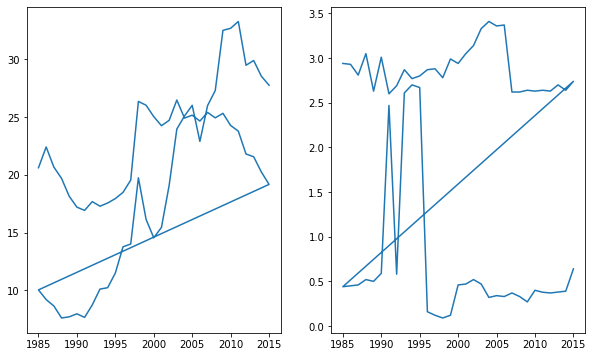

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axes[0].plot(al_su["year"], al_su["s_rate"])
axes[1].plot(al_su["year"], al_su["alcohol per capita"])